# Actividad 1
## Representacion de Sistemas y controladores

Se desarrollara la resolucion de los ejercicios planteados utilizando Python.
Primero, vamos a importar librerias y paquetes a utilizar.
Se debe ejecutar el siguiente código en una celda de código:

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import control as ct
from control.matlab import *
from IPython.display import Image
from scipy import signal
from math import log



### Circuito RLC

![Circuito RLC](images/circuit_RLC.png)




Sea el sistema eléctrico , con sus representacion en variables de estado : 

$\dot{x}=A x(t)+b u(t)$

$y=c^{T}x(t)$

Donde las matrices contienen a los coeficientes del circuito,

$ A =\begin{bmatrix}
 -R/L & -1/L \\ 
 1/C & 0 
\end{bmatrix}$

$ B = \begin{bmatrix}
1/L \\ 
0
\end{bmatrix} $

$ c^T =\begin{bmatrix}
 R & 0
\end{bmatrix} $

### Item [1]

Asignar valores a R=47ohm, L=1uHy, y C=100nF. Obtener simulaciones que permitan
estudiar la dinámica del sistema, con una entrada de tensión escalón de 12V, que cada 1ms cambia
de signo.

Para la simulacion se va a utilizar una entrada de 12V la cual cambia de signo cada 1ms

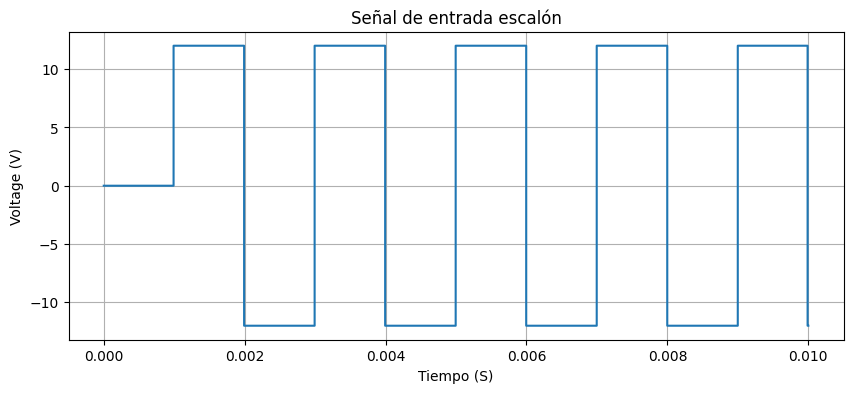

In [100]:

t_sim = 1000  # Duración de la simulación en ms
t = np.linspace(0, 0.01, t_sim)  # Arreglo de tiempo en ms
frecuencia = 500  # Frecuencia de la señal en Hz

delay = 0.001

# Generar señal cuadrada con fase ajustada para que empiece en 0 V en t=0
entrada = 12 * signal.square(2 * np.pi * frecuencia * t-np.pi, duty=0.5)

# Ajustar la señal para que esté en 0 V en t = 0 ms
entrada[0] = 0

entrada_delayed= np.where(t >= delay, entrada, 0)

# Visualizar la señal de entrada
plt.figure(figsize=(10, 4))
plt.plot(t, entrada_delayed, drawstyle='steps-pre')
plt.title('Señal de entrada escalón')
plt.xlabel('Tiempo (S)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.show()

## Dinamica del sistema

Estudiar dinamica del sistema, obteniendo la FDT y analizando sus polos.
Para determinar el paso o tiempo de integracion se busca el polo que corrsponde a la dinamica mas rápida para la cual se llega a un 95%. El paso de integración debe ser al menos 10 veces mas chico que el timepo calculado

Para determinar el tiempode simulacion se busca el polo que corresponde con la dinámica mas lenta para la cual se llega a un 5%

In [101]:

R=47
L=1e-6
C=100e-9

A=[[-R/L, -1/L], [1/C, 0]]
B=[[1/L], [0]]
C=[[R,0]] 
D=[[0]]                 

# Obtener la función de transferencia
tf = ct.minreal(ss2tf(A, B, C, D))

# Imprimir la función de transferencia
print(tf)

#Obtener polos de la función de transferencia
poles = ct.poles(tf)
print(poles)    

#Paso de integracion (h) -> Dinamica rapida (polo mas alejado eje imaginario)

pR = min(poles)
print("El polo más rápido es: {:e}".format(pR))

h=((log(0.95)/pR)/10)
print("El paso de integracion es:{:e}".format(h))

#Tiempo de simulacion (ts)

pL=max(poles) 
print("El polo más rápido es: {:e}".format(pL))

ts=((log(0.05)/pL)*5)
print("El tiempo de simulacion es :{:e}".format(ts))


0 states have been removed from the model
<TransferFunction>: sys[56]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


       4.7e+07 s
-----------------------
s^2 + 4.7e+07 s + 1e+13

[-46786262.04439004+0.j   -213737.95560996+0.j]
El polo más rápido es: -4.678626e+07+0.000000e+00j
El paso de integracion es:1.096332e-10-0.000000e+00j
El polo más rápido es: -2.137380e+05+0.000000e+00j
El tiempo de simulacion es :7.007956e-05+0.000000e+00j


En primer lugar simularemos con los siguientes valores:

- $ R = 47  \Omega $
- $ L = 1  \mu Hy $
- $ C = 100  nF $

Luego simulamos la respuesta del circuito


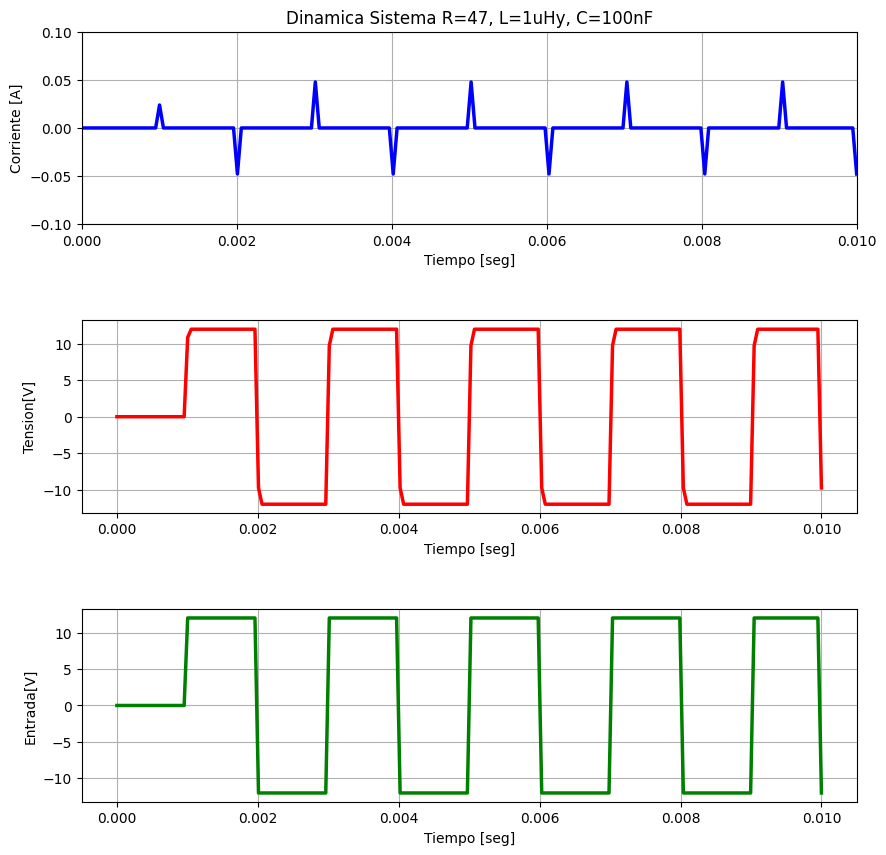

In [102]:
R=47
L=1e-6
C=100e-9

A=[[-R/L, -1/L], [1/C, 0]]
B=[[1/L], [0]]
C1=[[1, 0]] #Matriz para medir corriente
C2=[[0, 1]] #Matriz para medir voltage
D=[[0]]

sys1 = signal.StateSpace(A, B, C1, D) #voltaje capacitor
sys2 = signal.StateSpace(A, B, C2, D) #corrient

#------------------------------------------------#
t_sim = 200 # Duración de la simulación en ms
t = np.linspace(0, 0.01, t_sim)  # Arreglo de tiempo en ms
frecuencia = 500  # Frecuencia de la señal en Hz

delay = 0.001

# Generar señal cuadrada con fase ajustada para que empiece en 0 V en t=0
entrada = 12 * signal.square(2 * np.pi * frecuencia * t-np.pi, duty=0.5)

# Ajustar la señal para que esté en 0 V en t = 0 ms
entrada[0] = 0

u= entrada_delayed= np.where(t >= delay, entrada, 0)

#------------------------------------------------#

# Simular la respuesta del sistema
t1,y1,x1= signal.lsim(sys1,u, t) # simular sistemas lineales e invariantes en el tiempo (LTI)
t2,y2,x2= signal.lsim(sys2,u, t) 

# Visualizar la salida del sistema
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
plt.plot(t1, y1, 'b-', linewidth=2.5,label='Corriente')
plt.grid()
plt.title('Dinamica Sistema R=47, L=1uHy, C=100nF')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Corriente [A]')
plt.ylim(-0.1, 0.1)
plt.xlim(0, 0.01) 

plt.subplots_adjust(hspace = 0.5)  # Ajustar el espacio entre los subplots


plt.subplot(3, 1, 2)
plt.plot(t2, y2, 'r-', linewidth=2.5, label='Tension')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Tension[V]')
plt.grid()


plt.subplot(3, 1, 3)
plt.plot(t, u, 'g-', linewidth=2.5, label='Entrada')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Entrada[V]')
plt.grid()


Tomando como ejemplo otros valores vistos en clases:

- $ R = 4.7 k\Omega $
- $ L = 10  \mu Hy $
- $ C = 100  nF $

Luego simulamos la respuesta del circuito


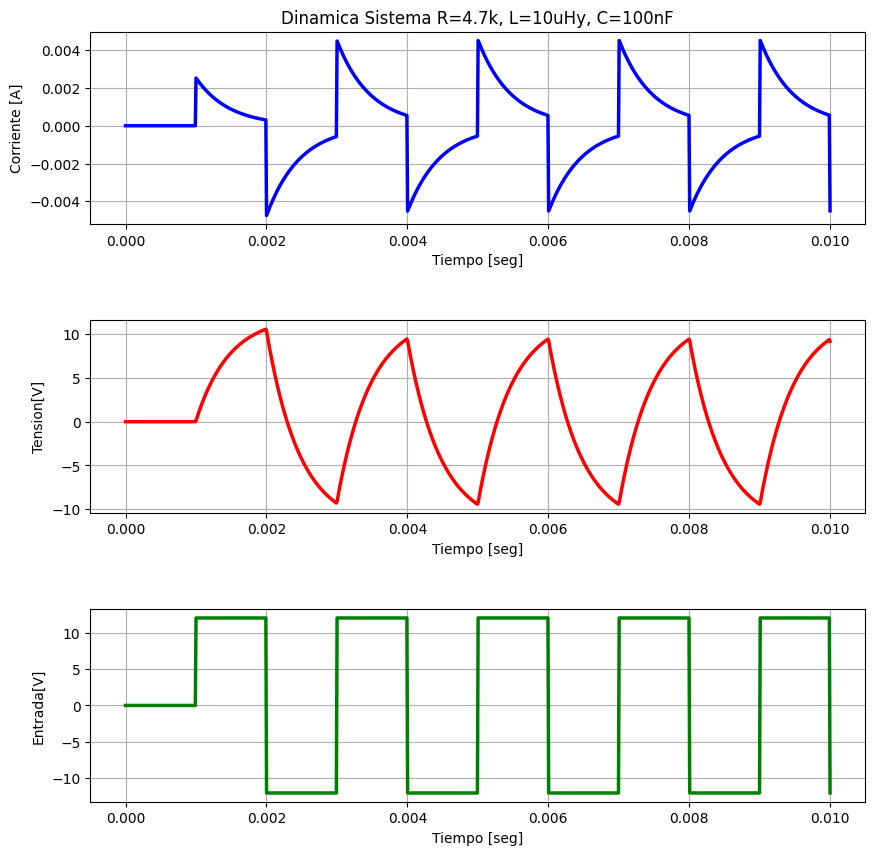

In [103]:
R=4.7e3
L=10e-6
C=100e-9

A=[[-R/L, -1/L], [1/C, 0]]
B=[[1/L], [0]]
C1=[[1, 0]] #Matriz para medir corriente
C2=[[0, 1]] #Matriz para medir voltage
D=[[0]]

sys1 = signal.StateSpace(A, B, C1, D) #voltaje capacitor
sys2 = signal.StateSpace(A, B, C2, D) #corrient

#------------------------------------------------#
t_sim = 1000 # Duración de la simulación en ms
t = np.linspace(0, 0.01, t_sim)  # Arreglo de tiempo en ms
frecuencia = 500  # Frecuencia de la señal en Hz

delay = 0.001

# Generar señal cuadrada con fase ajustada para que empiece en 0 V en t=0
entrada = 12 * signal.square(2 * np.pi * frecuencia * t-np.pi, duty=0.5)

# Ajustar la señal para que esté en 0 V en t = 0 ms
entrada[0] = 0

u= entrada_delayed= np.where(t >= delay, entrada, 0)

#------------------------------------------------#

# Simular la respuesta del sistema
t1,y1,x1= signal.lsim(sys1,u, t) # simular sistemas lineales e invariantes en el tiempo (LTI)
t2,y2,x2= signal.lsim(sys2,u, t) 

# Visualizar la salida del sistema
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
plt.plot(t1, y1, 'b-', linewidth=2.5,label='Corriente')
plt.grid()
plt.title('Dinamica Sistema R=4.7k, L=10uHy, C=100nF')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Corriente [A]')

plt.subplots_adjust(hspace = 0.5)  # Ajustar el espacio entre los subplots


plt.subplot(3, 1, 2)
plt.plot(t2, y2, 'r-', linewidth=2.5, label='Tension')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Tension[V]')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t, u, 'g-', linewidth=2.5, label='Entrada')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Entrada[V]')
plt.grid()








### Item [2] - Determinar valores componentes
En el archivo Curvas_Medidas_RLC.xls (datos en la hoja 1 y etiquetas en la hoja 2)
están las series de datos que sirven para deducir los valores de R, L y C del circuito. Emplear el
método de la respuesta al escalón, tomando como salida la tensión en el capacitor.


En primer lugar a partir de los datos extraidos graficaremos las curvas de tension de entrada y corriente y tension en el capacitor. Para ello extraemos datos del archivo .xls

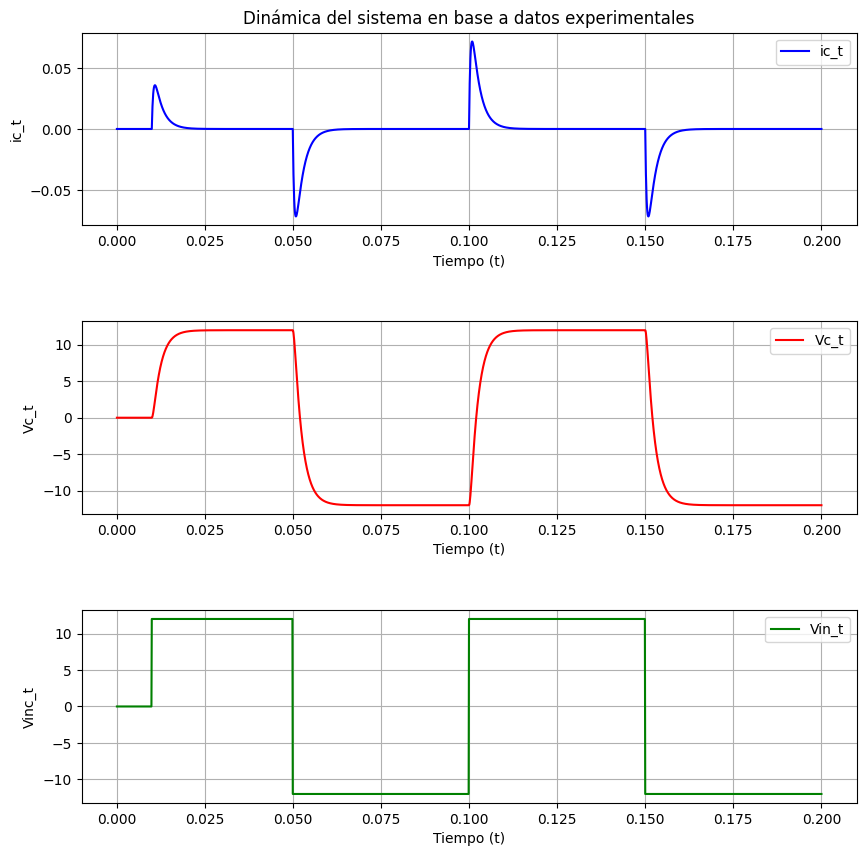

In [104]:
df= pd.read_excel('Curvas_Medidas_RLC_2024.xls') # extraigo datos de xls

t = df.iloc[:, 0] #selecciono primera columna y todas sus filas, guardo como variable t
ic_t = df.iloc[:, 1]
Vc_t = df.iloc[:, 2]
Vin_t= df.iloc[:, 3]

## Graficos de variables
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
plt.plot(t,ic_t,'b-', label='ic_t')
plt.title('Dinámica del sistema en base a datos experimentales')
plt.xlabel('Tiempo (t)')
plt.ylabel('ic_t')
plt.legend()
plt.grid(True)

plt.subplots_adjust(hspace = 0.5)  # Ajustar el espacio entre los subplot

plt.subplot(3, 1, 2)
plt.plot(t,Vc_t ,'r-', label='Vc_t')
plt.xlabel('Tiempo (t)')
plt.ylabel('Vc_t')
plt.legend()
plt.grid(True)


plt.subplot(3, 1, 3)
plt.plot(t,Vin_t ,'g-', label='Vin_t')
plt.xlabel('Tiempo (t)')
plt.ylabel('Vinc_t')
plt.legend()
plt.grid(True)


plt.show()




El objetivo ahora, es a partir de dichos graficos es obtener la funcion de transferencia del sistema, la que despues nos permite, en nuestro caso , obtener los valores de R,L,C del circuito

Basandonos en las variables de entrada y salida

Partiendo nuevamente del circuito

![Circuito RLC](images/circuit_RLC.png)

Planteando las ecuaciones diferenciales del mismo


$\frac{di}{dt}=-\frac{R}{L}i-\frac{1}{L}vc+\frac{1}{L}ve$

$\frac{dv_c}{dt}=-\frac{1}{C}i$

Podemos expresar las mismas en una ecuacion matricial-vectorial

$\begin{bmatrix}\frac{di}{dt}\\ \frac{dv_c}{dt}\end{bmatrix} $ 
$ = \begin{bmatrix}-R/L &-1/L \\ 1/C & 0 \end{bmatrix} $
$\begin{bmatrix}i\\vc \end{bmatrix} $
$+ \begin{bmatrix}1/L\\0 \end{bmatrix}$
$\begin{bmatrix}V_e \end{bmatrix}$

Definiendo a i,vc como variables de estado y a x como vector de estado , podemos expresarlo como:

$\dot{x}=A x(t)+b(u)$

Transformando al dominio de laplace el conjunto de  ecuaciones

$sI(s)=\frac{1}{L}$

$sV_c(s)=\frac{1}{C}I(s)$

Despejamos I de ambas ecuaciones para igualar y obtener la FdT de la tension en el capcitor

$G(s)=\frac{1}{LCs^{2}-CRs+1}$

Se obvserva que es una FdT de segundo grado y tiene dos polos reales y distintos. Aplicaremos método Chen para reconocerla.

$G(s)=\frac{K(T_3s+1)}{(T_1s+1)(T_2s+1)}$

Basandonos en los recursos de Identificacion.ipynb brindados en clase

Como nos indica el metodo debemos definir un intervalo de tiempo $t_1$ que será usado de referencia, que es lo que se nos pide en el metodo de de chen. En primer lugar debemos detectar nuestro t1 de referencia, para ello con ayuda de graficas interactivas podremos expandir nuestros graficos y obtener aproximadamente nuestro t1 que luego integrara el algoritmo de Chen


In [105]:
import plotly.graph_objects as go
import pandas as pd

df= pd.read_excel('Curvas_Medidas_RLC_2024.xls') # extraigo datos de xls

t = df.iloc[:, 0] #selecciono primera columna y todas sus filas, guardo como variable t
ic_t = df.iloc[:, 1]
Vc_t = df.iloc[:, 2]
Vin_t= df.iloc[:, 3]

# Gráfico para ic_t
fig1 = go.Figure()

fig1.add_trace(go.Scatter(
    x=t,
    y=ic_t,
    mode='lines',
    name='ic_t',
    hovertemplate='Tiempo: %{x:.2f}s, Corriente: %{y:.2f}A'
))

fig1.update_layout(
  
    xaxis_title='Tiempo (t)',
    yaxis_title='ic_t',
)

fig1.show()

# Gráfico para Vc_t
fig2 = go.Figure()

fig2.add_trace(go.Scatter(
    x=t,
    y=Vc_t,
    mode='lines',
    name='Vc_t',
    hovertemplate='Tiempo: %{x:.2f}s, Vc_t: %{y:.2f}'
))

fig2.update_layout(
    
    xaxis_title='Tiempo (t)',
    yaxis_title='Vc_t',
)

fig2.show()

# Gráfico para Vin_t
fig3 = go.Figure()

fig3.add_trace(go.Scatter(
    x=t,
    y=Vin_t,
    mode='lines',
    name='Vin_t',
    hovertemplate='Tiempo: %{x:.2f}s, Vin_t: %{y:.2f}'
))

fig3.update_layout(
 
    xaxis_title='Tiempo (t)',
    yaxis_title='Vin_t',
)

Con el objetivo de tomar bien la dinamica del sistema tomamos un t1=0.01 (despreciando retardo)
Basandonos en el recurso dado en clase:

$y(t1)=y(0.01)=10.6$

$y(2t1)=y(0.02)=11.88$

$y(3t1)=y(0.03)=11.99$


In [106]:
yt1 = 10.6
yt2 = 11.88
yt3 = 11.99
Kp= 12

yt_1=yt1/12
yt_2=yt2/12
yt_3=yt3/12
K=Kp/12

k_1 = (yt_1 / K) - 1
k_2 = (yt_2 / K) - 1
k_3 = (yt_3 / K) - 1

print('k_1: {:.2e}'.format(k_1))
print('k_2: {:.2e}'.format(k_2))
print('k_3: {:.2e}'.format(k_3))


k_1: -1.17e-01
k_2: -1.00e-02
k_3: -8.33e-04


Con dichos resultados la resolucion consiste en encontrar las constantes , que luego nos permitiran encontrar las constantes del sistema


In [107]:
be = 4 * (k_1**3) * k_3 - 3 * (k_1**2) * (k_2**2) - 4 * (k_2**3) + (k_3**2) + 6 * k_1 * k_2 * k_3


alpha_1 = (k_1 * k_2 + k_3 - np.sqrt(be)) / (2 * (k_1**2 + k_2))
alpha_2 = (k_1 * k_2 + k_3 + np.sqrt(be)) / (2 * (k_1**2 + k_2))


beta=(k_1+alpha_2)/(alpha_1-alpha_2)

print('be: {:.2e}'.format(be))
print('alpha_1: {:.2e}'.format(alpha_1))
print('alpha_2: {:.2e}'.format(alpha_2))
print('beta: {:.2e}'.format(beta))


be: 7.10e-08
alpha_1: 9.26e-03
alpha_2: 8.30e-02
beta: 4.56e-01


Estimamos entonces las constantes del sistema



In [108]:
t_1 = 0.0054
T_1 = -t_1 / np.log(alpha_1)
T_2 = -t_1 / np.log(alpha_2)
T_3 = beta * (T_1 - T_2) + T_1

print('T_1: {:.2e}'.format(T_1))
print('T_2: {:.2e}'.format(T_2))
print('T_3: {:.2e}'.format(T_3))

T_1: 1.15e-03
T_2: 2.17e-03
T_3: 6.90e-04


Una vez determinado las constantes puedo determinar la FT

<TransferFunction>: sys[59]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


              1
------------------------------
2.503e-06 s^2 + 0.003324 s + 1



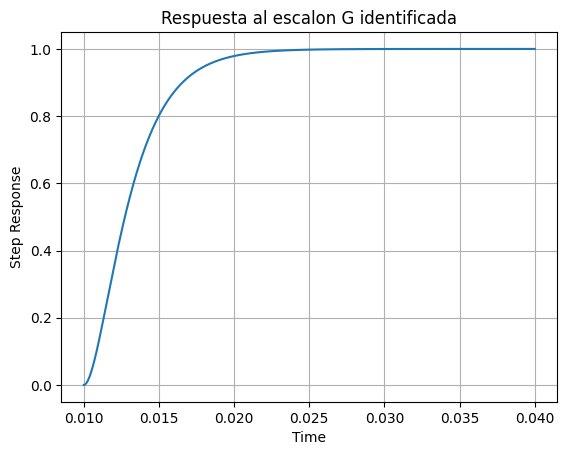

In [109]:

t_s= np.linspace(0, 0.03, 1000)


# Crear la función de transferencia utilizando control.tf()#
sys_G = K*ct.tf([0, 1],np.convolve([T_1, 1],[T_2, 1]))


# Calcular la respuesta al escalón del sistema identificado#
y_id , t_id = step(1*sys_G, t_s)

# Agregar un retraso a la respuesta al escalón
delay = 0.01  # Retraso en segundos
t_id_delayed = t_id + delay

print(sys_G)


plt.plot(t_id_delayed, y_id)

plt.xlabel('Time')
plt.ylabel('Step Response')
plt.title('Respuesta al escalon G identificada')
plt.grid(True)
plt.show()



Superponiendo con la grafica anteriormente obtendia a partir del archivo .xls

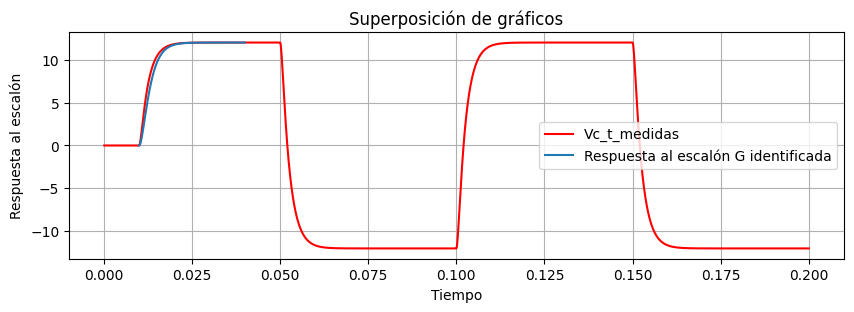

In [110]:
# Graficar Vc_t
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 2)
plt.plot(t, Vc_t, 'r-', label='Vc_t_medidas')
plt.xlabel('Tiempo (t)')
plt.ylabel('Vc_t')
plt.legend()
plt.grid(True)

Ksys=12

# Graficar la respuesta al escalón del sistema identificado
plt.plot(t_id_delayed,Ksys * y_id, label='Respuesta al escalón G identificada')
plt.xlabel('Tiempo')
plt.ylabel('Respuesta al escalón')
plt.title('Superposición de gráficos')
plt.grid(True)
plt.legend()
plt.show()

In [111]:
import plotly.graph_objects as go

Ksys=12

# Crear el gráfico para Vc_t y la respuesta al escalón del sistema identificado
fig = go.Figure()

# Agregar trazo para Vc_t
fig.add_trace(go.Scatter(
    x=t,
    y=Vc_t,
    mode='lines',
    name='Vc_t',
    hovertemplate='Tiempo: %{x:.2f}s, Vc_t: %{y:.2f}',
))

# Agregar trazo para la respuesta al escalón del sistema identificado
fig.add_trace(go.Scatter(
    x=t_id_delayed,
    y=Ksys* y_id,
    mode='lines',
    name='Respuesta al escalón G identificada',
    hovertemplate='Tiempo: %{x:.2f}s, Respuesta al escalón: %{y:.2f}',
))

fig.update_layout(
    xaxis_title='Tiempo (t)',
    yaxis_title='Vc_t / Respuesta al escalón',
)

fig.show()

### Determinacion Parámetro RLC

Teniendo en cuenta los valores obtenidos de las graficas de datos, vemos que tenemos una tension de 12V y aproximadamente 40mA de pico de corriente, lo que nos permite estimar un valor de R . Tomaremos un valor de R=270

A partir de la FdT obtenemos como dato que

$LC=2.503e-6$

$CR=3.324e-3$

    

In [112]:
R=270
C=3.324e-3/R
L=2503e-6/C
print(L)
print(C)

203.31227436823104
1.2311111111111112e-05


## Ítem [3] 
Una vez determinados los parámetros R, L y C, emplear la serie de corriente desde 0.05seg en adelante para validar el resultado superponiendo las gráficas.

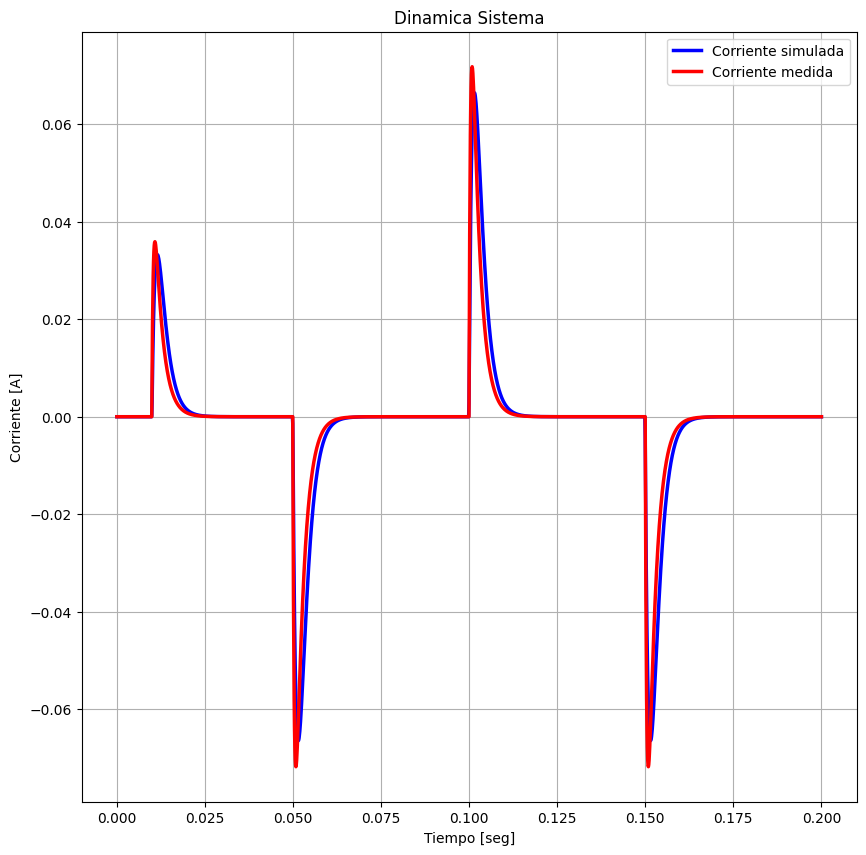

In [113]:
from scipy.interpolate import interp1d

# Definir los valores de R, L y C
R = 270  
L = 203e-3
C = 12.3e-6

df= pd.read_excel('Curvas_Medidas_RLC_2024.xls') # extraigo datos de xls

t = df.iloc[:, 0] #selecciono primera columna y todas sus filas, guardo como variable t
Vin_t= df.iloc[:, 3]


# Interpolar los datos de entrada
Vin_t_func = interp1d(t, Vin_t, fill_value="extrapolate")

# Crear un arreglo de tiempo para la simulación
t_sim = np.linspace(0, max(t), len(t))

# Crear la señal de entrada para la simulación
u = Vin_t_func(t_sim)


A=[[-R/L, -1/L], [1/C, 0]]
B=[[1/L], [0]]
C=[[1, 0]] #Matriz para medir corriente
D=[[0]]

sys = signal.StateSpace(A, B, C, D)

# Simular la respuesta del sistema
t1,y1,x1= signal.lsim(sys,u, t) # simular sistemas lineales e invariantes en el tiempo (LTI)

# Visualizar la salida del sistema
plt.figure(figsize=(10, 10))

# Plot both the simulated current and the measured current on the same subplot
plt.plot(t1, y1, 'b-', linewidth=2.5, label='Corriente simulada')
plt.plot(t, ic_t, 'r-', linewidth=2.5, label='Corriente medida')

plt.grid()
plt.title('Dinamica Sistema')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Corriente [A]')
plt.legend()

plt.show()






In [114]:
# Calcular el valor máximo de la corriente simulada
max_current_simulado = max(y1)

# Calcular el valor máximo de la corriente medida
max_current_medido = max(ic_t)

print("El valor máximo de la corriente simulada es: ", max_current_simulado)
print("El valor máximo de la corriente medida es: ", max_current_medido)

El valor máximo de la corriente simulada es:  0.06639982210909336
El valor máximo de la corriente medida es:  0.07176714792834286
